# <center> Capstone Neighborhood Clustering.</center>

In [2]:
#importing the neccesary libraries
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [3]:
#getting the wiki url
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [4]:
# we load the url and use soup to get all the values in the table class = wikitable
web = requests.get(url).text
soup = bs(web,'lxml')
wiki = soup.find("table",class_='wikitable')

In [5]:
#we need now to iterate and find all values between tr and td, we use strip to remove the tr and td
data_clean=[]
for tr in wiki.find_all('tr'):
    for td in tr.find_all('td'):
        data_clean.append((td.find_all(text=True)[0].strip()))

In [6]:
# This gets us a list of all the values we need, but now, in order to transform into a dataframe, we need to group them every 3, so we iterate again 
data_final=[]
for i in range(0, len(data_clean), 3):
  data_final.append([data_clean[i],data_clean[i+1],data_clean[i+2]])

In [7]:
#we convert the list to a df
data_fr=pd.DataFrame(data_final)

In [8]:
#add the column headers
data_fr.columns = ['PostalCode', 'Borough', 'Neighborhood']

In [9]:
#we check how we are doing
data_fr.head(10)

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Queen's Park,Not assigned


In [10]:
#we remove the not assigned rows on borough
data_fr = data_fr.loc[data_fr['Borough'] != 'Not assigned']

In [11]:
# replacing the not assigned value with the borough value on neiighborhood column
data_fr['Neighborhood'].replace('Not assigned', data_fr['Borough'], inplace=True)
   

In [12]:
#we check, notice than Queens Park on the Neighborhood colum is no longer 'Not assigned' and correctly has borough value
data_fr.head(10)

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Queen's Park,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [13]:
#grouping first by postal code and then by borough, to join the last value
asd = data_fr.groupby(['PostalCode', 'Borough']).agg(', '.join)

In [14]:
#resetting the indexes, and defining the df variable to the one we are goign to use.
df = asd.reset_index()

In [15]:
df.head(10)

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [16]:
#final shape of the dataframe
df.shape

(103, 3)

## Part 2

In [17]:
!wget -O geodata.csv https://cocl.us/Geospatial_data

--2020-01-21 19:46:37--  https://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 158.85.108.86, 169.48.113.194, 158.85.108.83
Connecting to cocl.us (cocl.us)|158.85.108.86|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-01-21 19:46:38--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.27.197, 107.152.26.197
Connecting to ibm.box.com (ibm.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-01-21 19:46:38--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9afzr83pps4pwf2sm

In [18]:
geo = pd.read_csv('geodata.csv')

In [19]:
df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [20]:
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [21]:
# we merge both databases
df2 = pd.merge(df,geo, left_index=True, right_index=True)

In [22]:
#We drop the duplicated column
df2.drop(columns=['Postal Code'], inplace=True)

In [23]:
df2.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [24]:
df2.shape

(103, 5)

## Part 3

In [25]:
#!conda install -c conda-forge folium=0.10.0 --yes
import numpy as np 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 


In [26]:
#using the code we learn in the NYC Neighborhood class.

address = 'Toronto, CA'

geolocator = Nominatim(user_agent="Not")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, CA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, CA are 43.653963, -79.387207.


In [27]:
#we drop postal code
df2.drop(columns=['PostalCode'], inplace=True)

In [28]:
# We create a map
map_canada = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canada)  

In [29]:
map_canada

In [30]:
#we are just going to analyze downtown toronto, so we drop the rest.
df_tor = df2[df2['Borough'] == 'Downtown Toronto'].reset_index(drop=True)

In [31]:
df_tor.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Rosedale,43.679563,-79.377529
1,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [32]:
#we get the coordinates for Downtown Toronto.

address = 'Downtown Toronto, CA'

geolocator = Nominatim(user_agent="Not")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, CA are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto, CA are 43.6563221, -79.3809161.


In [33]:
# We create a map for Downtown Toronto
map_downt = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers
for lat, lng, neighborhood in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downt)  

In [34]:
map_downt

### Foursquare API calls

In [35]:
CLIENT_ID = 'LSBU5B4Q22BJOHODKCQ1T0GTF4XVEUDAKSHCU5DENR4HP0EG' # your Foursquare ID
CLIENT_SECRET = 'RBLPNIIADWG5QSXMC3S4LCVLVGGYHXFFGROE31YXSO4J4YU2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LSBU5B4Q22BJOHODKCQ1T0GTF4XVEUDAKSHCU5DENR4HP0EG
CLIENT_SECRET:RBLPNIIADWG5QSXMC3S4LCVLVGGYHXFFGROE31YXSO4J4YU2


In [36]:
df_tor.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Rosedale,43.679563,-79.377529
1,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [37]:
#we inspect the first element of the df
df_tor.loc[0, 'Neighborhood']

'Rosedale'

In [38]:
#get the lat and long
neighborhood_latitude = df_tor.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_tor.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_tor.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rosedale are 43.6795626, -79.37752940000001.


In [39]:
# We build the url to get the nearby venues and limit the amounts we get to 100
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=LSBU5B4Q22BJOHODKCQ1T0GTF4XVEUDAKSHCU5DENR4HP0EG&client_secret=RBLPNIIADWG5QSXMC3S4LCVLVGGYHXFFGROE31YXSO4J4YU2&v=20180605&ll=43.6795626,-79.37752940000001&radius=500&limit=100'

In [40]:
#get command
import json
results = requests.get(url).json()

In [41]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# column names
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]


In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
# we create a dataframe with the values

toronto_venues = getNearbyVenues(names=df_tor['Neighborhood'],
                                   latitudes=df_tor['Latitude'],
                                   longitudes=df_tor['Longitude']
                                  )



Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Queen's Park


In [45]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,"Cabbagetown, St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner


In [46]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",43,43,43,43,43,43
Central Bay Street,83,83,83,83,83,83
"Chinatown, Grange Park, Kensington Market",88,88,88,88,88,88
Christie,17,17,17,17,17,17
Church and Wellesley,85,85,85,85,85,85
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


In [47]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 204 uniques categories.


In [48]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
toronto_onehot.shape

(1310, 204)

In [50]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.020000,...,0.000000,0.00,0.00,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.01
1,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.00,0.00,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.000000,...,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,"Cabbagetown, St. James Town",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Central Bay Street,0.012048,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.012048,...,0.000000,0.00,0.00,0.00,0.012048,0.000000,0.000000,0.012048,0.000000,0.00
5,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.00,0.00,0.00,0.045455,0.000000,0.056818,0.011364,0.000000,0.00
6,Christie,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Church and Wellesley,0.011765,0.011765,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.011765,...,0.011765,0.00,0.00,0.00,0.000000,0.000000,0.011765,0.000000,0.011765,0.00
8,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.020000,...,0.000000,0.00,0.00,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00
9,"Design Exchange, Toronto Dominion Centre",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.020000,...,0.000000,0.00,0.00,0.01,0.010000,0.000000,0.000000,0.010000,0.000000,0.00


In [51]:
toronto_grouped.shape

(19, 204)

In [52]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Adelaide, King, Richmond ----
         venue  freq
0  Coffee Shop  0.07
1   Steakhouse  0.04
2          Bar  0.04
3         Café  0.04
4   Restaurant  0.03


---- Berczy Park ----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.05
2        Beer Bar  0.04
3      Steakhouse  0.04
4  Farmers Market  0.04


---- CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara ----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12
2  Airport Terminal  0.12
3     Boat or Ferry  0.06
4   Harbor / Marina  0.06


---- Cabbagetown, St. James Town ----
         venue  freq
0  Coffee Shop  0.07
1       Bakery  0.05
2         Café  0.05
3         Park  0.05
4          Pub  0.05


---- Central Bay Street ----
                venue  freq
0         Coffee Shop  0.16
1  Italian Restaurant  0.05
2                Café  0.04
3        Burger Joint  0.04
4      Ice Cream Shop  0.04


---- Chinatown, Grange Park, 

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Steakhouse,Cosmetics Shop,Restaurant,Hotel,Thai Restaurant,Asian Restaurant,Burger Joint
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Steakhouse,Café,Seafood Restaurant,Bakery,Farmers Market,Beer Bar,Gourmet Shop
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Boutique,Sculpture Garden,Rental Car Location,Boat or Ferry,Harbor / Marina,Bar,Coffee Shop
3,"Cabbagetown, St. James Town",Coffee Shop,Park,Restaurant,Pub,Bakery,Italian Restaurant,Pizza Place,Market,Café,Breakfast Spot
4,Central Bay Street,Coffee Shop,Italian Restaurant,Burger Joint,Café,Ice Cream Shop,Juice Bar,Sandwich Place,Japanese Restaurant,Bar,Bakery


## Clustering

Text(0, 0.5, 'WCSS')

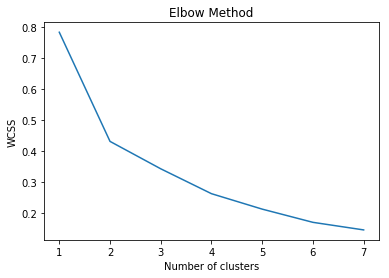

In [55]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

wcss=[]
k=8

for i in range (1, k): 
    kmeans= KMeans(i)
    kmeans.fit(toronto_grouped_clustering)
    wcss_iter  = kmeans.inertia_
    wcss.append(wcss_iter)
    
number_clusters = range(1, k)
plt.plot(number_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [56]:
toronto_grouped_clustering

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.020000,0.000000,...,0.000000,0.00,0.00,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.01
1,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.00,0.00,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00
2,0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.000000,0.000000,...,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,0.012048,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.012048,0.000000,...,0.000000,0.00,0.00,0.00,0.012048,0.000000,0.000000,0.012048,0.000000,0.00
5,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.00,0.00,0.00,0.045455,0.000000,0.056818,0.011364,0.000000,0.00
6,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,0.011765,0.011765,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.011765,0.000000,...,0.011765,0.00,0.00,0.00,0.000000,0.000000,0.011765,0.000000,0.011765,0.00
8,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.020000,0.000000,...,0.000000,0.00,0.00,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00
9,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.020000,0.000000,...,0.000000,0.00,0.00,0.01,0.010000,0.000000,0.000000,0.010000,0.000000,0.00


In [57]:
#Fit Model definitive

kclusters=3

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [58]:
toronto_grouped_clustering.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0.000000,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.020000,0.0,...,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.000000,0.0,0.01
1,0.000000,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.017544,0.0,0.0,0.000000,0.0,0.00
2,0.000000,0.0,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00
3,0.000000,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00
4,0.012048,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.012048,0.0,...,0.0,0.0,0.0,0.0,0.012048,0.0,0.0,0.012048,0.0,0.00


In [59]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_tor

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Rosedale,43.679563,-79.377529,1,Park,Playground,Trail,Creperie,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner,Dim Sum Restaurant
1,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,0,Coffee Shop,Park,Restaurant,Pub,Bakery,Italian Restaurant,Pizza Place,Market,Café,Breakfast Spot
2,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Pizza Place,Gastropub,Men's Store,Fast Food Restaurant,Bubble Tea Shop
3,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Pub,Mexican Restaurant,Café,Restaurant,Breakfast Spot,Ice Cream Shop,Spa
4,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Fast Food Restaurant,Bakery,Middle Eastern Restaurant,Japanese Restaurant,Pizza Place,Restaurant


In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Cabbagetown, St. James Town",Coffee Shop,Park,Restaurant,Pub,Bakery,Italian Restaurant,Pizza Place,Market,Café,Breakfast Spot
2,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Pizza Place,Gastropub,Men's Store,Fast Food Restaurant,Bubble Tea Shop
3,Harbourfront,Coffee Shop,Bakery,Park,Pub,Mexican Restaurant,Café,Restaurant,Breakfast Spot,Ice Cream Shop,Spa
4,"Ryerson, Garden District",Coffee Shop,Clothing Store,Café,Cosmetics Shop,Fast Food Restaurant,Bakery,Middle Eastern Restaurant,Japanese Restaurant,Pizza Place,Restaurant
5,St. James Town,Coffee Shop,Restaurant,Café,Cocktail Bar,Clothing Store,Italian Restaurant,Hotel,Bakery,Beer Bar,Cosmetics Shop
6,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Steakhouse,Café,Seafood Restaurant,Bakery,Farmers Market,Beer Bar,Gourmet Shop
7,Central Bay Street,Coffee Shop,Italian Restaurant,Burger Joint,Café,Ice Cream Shop,Juice Bar,Sandwich Place,Japanese Restaurant,Bar,Bakery
8,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Steakhouse,Cosmetics Shop,Restaurant,Hotel,Thai Restaurant,Asian Restaurant,Burger Joint
9,"Harbourfront East, Toronto Islands, Union Station",Coffee Shop,Aquarium,Café,Hotel,Scenic Lookout,Restaurant,Fried Chicken Joint,Italian Restaurant,Brewery,Bakery
10,"Design Exchange, Toronto Dominion Centre",Coffee Shop,Café,Hotel,Bar,Restaurant,Seafood Restaurant,Gastropub,Steakhouse,Italian Restaurant,American Restaurant


In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rosedale,Park,Playground,Trail,Creperie,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner,Dim Sum Restaurant


In [63]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Boutique,Sculpture Garden,Rental Car Location,Boat or Ferry,Harbor / Marina,Bar,Coffee Shop


In [64]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


## Week 2 Partial...


In [65]:
#we checkpoint the db
df_neig=df2

In [66]:
neighborhood_latitude = df_neig.loc[0, 'Latitude'] # neighborhood latitude value

neighborhood_longitude = df_neig.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_neig.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge, Malvern are 43.806686299999996, -79.19435340000001.


In [67]:
# We build the url to search the nearby venues and limit the amounts we get to 150 + 100 radius
LIMIT = 150 
radius = 1200
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&intent=browse&limit={}&category=4d4b7105d754a06374d81259'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    LIMIT)
url2


'https://api.foursquare.com/v2/venues/explore?&client_id=LSBU5B4Q22BJOHODKCQ1T0GTF4XVEUDAKSHCU5DENR4HP0EG&client_secret=RBLPNIIADWG5QSXMC3S4LCVLVGGYHXFFGROE31YXSO4J4YU2&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=1200&intent=browse&limit=150'

In [68]:
#get command
import json
results2 = requests.get(url2).json()

In [69]:
venues = results2['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# column names
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [70]:
toronto_allvenues = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )



Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [71]:
# We group by category
grouped=toronto_allvenues.groupby(['Venue Category']).count()

In [72]:
#we check the top 20 business in industry size
grouped.sort_values(by='Venue', ascending=False).head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,192,192,192,192,192,192
Café,98,98,98,98,98,98
Restaurant,61,61,61,61,61,61
Park,52,52,52,52,52,52
Pizza Place,51,51,51,51,51,51
Bakery,50,50,50,50,50,50
Italian Restaurant,45,45,45,45,45,45
Bar,44,44,44,44,44,44
Sandwich Place,41,41,41,41,41,41


In [73]:
toronto_allvenues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Marina Spa,43.766000,-79.191000,Spa


In [74]:
toronto_allvenues=toronto_allvenues.drop(columns=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue'])


In [75]:
#We get the top 5 shops by amount
venuestop=toronto_allvenues

cof_shop = venuestop[venuestop['Venue Category'].str.match('Coffee Shop')]
cafe = venuestop[venuestop['Venue Category'].str.match('Café')]
pizza = venuestop[venuestop['Venue Category'].str.match('Pizza Place')]
bakery = venuestop[venuestop['Venue Category'].str.match('Bakery')]
rest = venuestop[venuestop['Venue Category'].str.match('Restaurant')]

In [76]:
cof_shop.head()

,Venue Latitude,Venue Longitude,Venue Category
10,43.770037,-79.221156,Coffee Shop
11,43.770827,-79.223078,Coffee Shop
24,43.726895,-79.266157,Coffee Shop
78,43.799102,-79.318715,Coffee Shop
97,43.777700,-79.344652,Coffee Shop


In [77]:
venuescluster=[]
venuescluster = pd.concat([cof_shop, cafe, pizza, bakery, rest])

In [78]:
venuescluster.reset_index(drop=True)
venuescluster.groupby(by=['Venue Category']).count()

,Venue Latitude,Venue Longitude
Venue Category,,
Bakery,50,50
Café,98,98
Coffee Shop,192,192
Pizza Place,51,51
Restaurant,61,61


In [79]:
venuescluster.head()

,Venue Latitude,Venue Longitude,Venue Category
10,43.770037,-79.221156,Coffee Shop
11,43.770827,-79.223078,Coffee Shop
24,43.726895,-79.266157,Coffee Shop
78,43.799102,-79.318715,Coffee Shop
97,43.777700,-79.344652,Coffee Shop


Text(0, 0.5, 'WCSS')

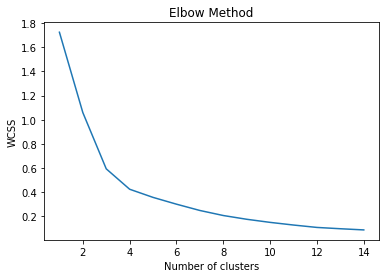

In [87]:
wcss=[]
k=15

for i in range (1, k): 
    kmeans= KMeans(i)
    kmeans.fit(venuescluster[venuescluster.columns[0:2]])
    wcss_iter  = kmeans.inertia_
    wcss.append(wcss_iter)
    
number_clusters = range(1, k)
plt.plot(number_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [81]:
k_opt=5
kmeans = KMeans(n_clusters = k_opt, init ='k-means++')
kmeans.fit(venuescluster[venuescluster.columns[0:2]]) # Compute k-means clustering.
venuescluster['Cluster_Label'] = kmeans.fit_predict(venuescluster[venuescluster.columns[0:2]]) #we add the labels column to the database
centers = kmeans.cluster_centers_ # centers if we need them
labels = kmeans.predict(venuescluster[venuescluster.columns[0:2]]) # labels

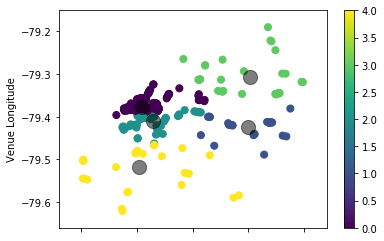

In [82]:
venuescluster.plot.scatter(x = 'Venue Latitude', y = 'Venue Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [92]:
# create map with commercial areas
map_commercial=folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_opt)
ys = [i + x + (i*x)**2 for i in range(k_opt)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venuescluster['Venue Latitude'], venuescluster['Venue Longitude'], venuescluster['Venue Category'], venuescluster['Cluster_Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        clustered_marker = True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_commercial)
       
map_commercial

In [84]:
aux=venuescluster

cluster0=aux[aux['Cluster_Label']==0]
cluster1=aux[aux['Cluster_Label']==1]
cluster2=aux[aux['Cluster_Label']==2]
cluster3=aux[aux['Cluster_Label']==3]
cluster4=aux[aux['Cluster_Label']==4]

cluster0 =cluster0.drop(columns=['Cluster_Label'])
cluster1 =cluster1.drop(columns=['Cluster_Label'])
cluster2 =cluster2.drop(columns=['Cluster_Label'])
cluster3 =cluster3.drop(columns=['Cluster_Label'])
cluster4 =cluster4.drop(columns=['Cluster_Label'])


In [129]:
cluster0.head()

,Venue Latitude,Venue Longitude,Venue Category
311,43.705611,-79.360775,Coffee Shop
318,43.705629,-79.361028,Coffee Shop
322,43.706564,-79.359591,Coffee Shop
333,43.710741,-79.360680,Coffee Shop
345,43.705090,-79.350545,Coffee Shop


In [132]:
def mapping(venuescluster):
    map_commercial=folium.Map(location=[latitude, longitude], zoom_start=14)

    # set color scheme for the clusters
    x = np.arange(k)
    ys = [i + x + (i*x)**2 for i in range(k)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi in zip(venuescluster['Venue Latitude'], venuescluster['Venue Longitude'], venuescluster['Venue Category']):
        label = folium.Popup(str(poi), parse_html=True)
        
        iconlist={'Coffee Shop':'coffee','Café':'coffee','Pizza Place':'circle','Bakery':'bold','Restaurant':'cutlery'}
        colorlist={'Coffee Shop':'red','Café':'blue','Pizza Place':'orange','Bakery':'pink', 'Restaurant':'green'}
        prefixlist={'Coffee Shop':'fa','Café':'fa','Pizza Place':'fa','Bakery':'fa', 'Restaurant':'glyphicon'}
        folium.Marker(
            [lat, lon],
            popup=label,
            icon=folium.Icon(color=colorlist[poi],icon=iconlist[poi], prefix=prefixlist[poi])).add_to(map_commercial)
        
            
       
    return map_commercial

In [133]:
mapping(cluster0)

In [160]:
red_area= cluster0.groupby(['Venue Category']).count()
red_area=red_area.rename(columns={'Venue Latitude': 'Amount'}).drop(['Venue Longitude'], axis=1).sort_values(by='Amount', ascending=False)
red_area

,Amount
Venue Category,
Coffee Shop,141
Café,58
Restaurant,40
Bakery,30
Pizza Place,19


In [161]:
blue_area= cluster2.groupby(['Venue Category']).count()
blue_area=blue_area.rename(columns={'Venue Latitude': 'Amount'}).drop(['Venue Longitude'], axis=1).sort_values(by='Amount', ascending=False)
blue_area

,Amount
Venue Category,
Café,25
Coffee Shop,19
Restaurant,11
Bakery,9
Pizza Place,8


In [162]:
purple_area= cluster1.groupby(['Venue Category']).count()
purple_area = purple_area.rename(columns={'Venue Latitude': 'Amount'}).drop(['Venue Longitude'], axis=1).sort_values(by='Amount', ascending=False)
purple_area

,Amount
Venue Category,
Coffee Shop,11
Café,5
Pizza Place,5
Restaurant,5
Bakery,1


In [163]:
green_area= cluster3.groupby(['Venue Category']).count()
green_area=green_area.rename(columns={'Venue Latitude': 'Amount'}).drop(['Venue Longitude'], axis=1).sort_values(by='Amount', ascending=False)
green_area

,Amount
Venue Category,
Coffee Shop,13
Bakery,6
Pizza Place,6
Café,3
Restaurant,1


In [164]:
yellow_area= cluster4.groupby(['Venue Category']).count()
yellow_area=yellow_area.rename(columns={'Venue Latitude': 'Amount'}).drop(['Venue Longitude'], axis=1).sort_values(by='Amount', ascending=False)
yellow_area

,Amount
Venue Category,
Pizza Place,13
Coffee Shop,8
Café,7
Bakery,4
Restaurant,4


In [134]:
mapping(cluster1)

In [135]:
mapping(cluster2)

In [136]:
mapping(cluster3)

In [137]:
mapping(cluster4)

In [155]:
red_area['Percentage']=round(red_area['Amount']/red_area['Amount'].sum()*100,2)

In [156]:
red_area

,Amount,Percentage
Venue Category,,
Coffee Shop,141,48.96
Café,58,20.14
Restaurant,40,13.89
Bakery,30,10.42
Pizza Place,19,6.60


In [165]:
blue_area['Percentage']=round(blue_area['Amount']/blue_area['Amount'].sum()*100,2)

In [166]:
blue_area

,Amount,Percentage
Venue Category,,
Café,25,34.72
Coffee Shop,19,26.39
Restaurant,11,15.28
Bakery,9,12.50
Pizza Place,8,11.11
